In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import random

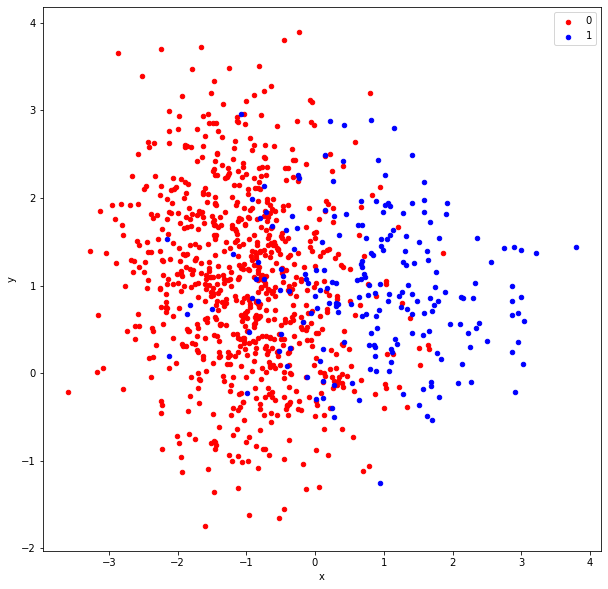

In [59]:
#Generate synthetic dataset
X, y = make_classification(n_samples = 1000,
                           n_features = 2,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           weights = [0.80],
                           random_state = 56)

df = pd.concat([pd.DataFrame(X), pd.Series(y)], axis = 1)
df.columns = ['x', 'y', 'label']

fig, ax = plt.subplots(figsize = (10,10))
grouped = df.groupby('label')
colors = {0:'red', 1:'blue'}
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [206]:
class SMOTE:
    
    def __init__(self, df, target_variable):
        
        self.df = df
        self.target_variable = target_variable
        self.x = self.df.drop(self.target_variable, axis = 1)
        self.y = self.df[self.target_variable]
    
    def distance(self, x, y):
        return np.sqrt(np.sum(np.square(x.values - y.values)))
    
    def nearest_neighbours(self, point, n):
        
        x = self.x.copy()
        x['D'] = x.apply(lambda row : self.distance(row, point), axis = 1)
        neighbours = x.drop(point.index)['D'].nsmallest(n).index
        
        return neighbours
        
    def generate(self):
        
        self.minority_class = np.argmin(self.y.value_counts()/len(self.y))
        self.majority_class = np.argmax(self.y.value_counts()/len(self.y))
        minority_points = self.x.loc[self.y[self.y == self.minority_class].index]
        samples = pd.DataFrame(columns = self.x.columns)
        
        while len(samples) + len(minority_points) < len(self.y == self.majority_class):
            random_point = minority_points.sample(1)
            neighbours = self.nearest_neighbours(random_point, 5)
            for idx in neighbours:
                lamda = np.array([random.random()] * len(random_point.columns))
                point = random_point.values[0] * lamda + self.x.loc[idx].values * (1 - lamda)
                samples = samples.append(dict(zip(self.x.columns, point)), ignore_index=True)
              
        samples[self.target_variable] = self.minority_class
        upsampled_df = self.df.append(samples, ignore_index = True)
        
        return upsampled_df

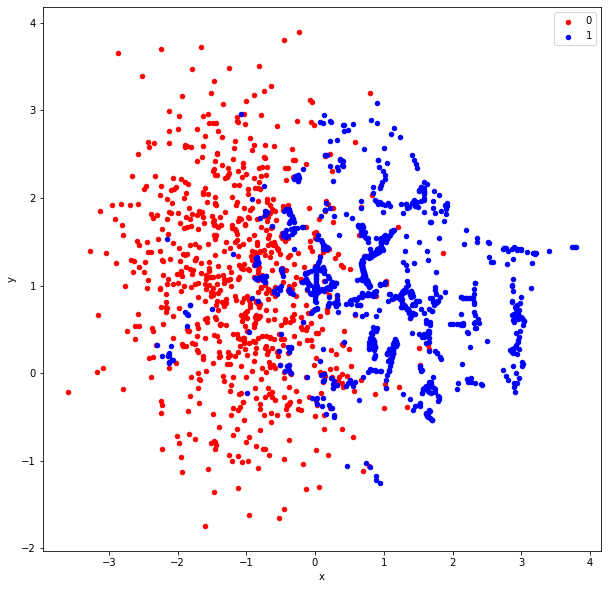

In [207]:
smote = SMOTE(df = df, target_variable = 'label')
upsampled_df = smote.generate()

fig, ax = plt.subplots(figsize = (10,10))
grouped = upsampled_df.groupby('label')
colors = {0:'red', 1:'blue'}
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()